# IPL Data Analysis (2008-2024)

### Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency, ttest_ind
%matplotlib inline

### Loading datasets

In [13]:
matches = pd.read_csv('../data/matches.csv')
deliveries = pd.read_csv('../data/deliveries.csv')

In [14]:
matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [15]:
# Displaying basic info
print('Matches Info:')
print(matches.info())
print('\nDeliveries Info:')
print(deliveries.info())


Matches Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  

In [16]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [17]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Data Cleaning
### Handle missing values

In [18]:
matches['winner'].fillna('No Result', inplace=True)
matches['result_margin'].fillna(0, inplace=True)
matches['method'].fillna('Standard', inplace=True)  # Mark D/L games
deliveries['player_dismissed'].fillna('Not Out', inplace=True)

In [19]:
matches.isna().sum()

id                  0
season              0
city               51
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
target_runs         3
target_overs        3
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [20]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed         0
dismissal_kind      247970
fielder             251566
dtype: int64

In [21]:
matches.method.unique()

array(['Standard', 'D/L'], dtype=object)

### Standardizing team names

In [22]:
# Standardize team names
team_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergaints': 'Rising Pune Supergiants'  # Added to merge redundant name
}
matches.replace(team_mapping, inplace=True)
deliveries.replace(team_mapping, inplace=True)


In [23]:
matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [24]:
sorted(set(matches['team1'].unique()) | set(matches['team2'].unique()))

['Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [25]:
kpis = {}
team_totals = deliveries.groupby(['match_id', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
kpis['highest_team_totals'] = team_totals.sort_values('total_runs', ascending=False).head(10)

In [26]:
team_totals

,match_id,batting_team,bowling_team,total_runs
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,222
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,82
2,335983,Chennai Super Kings,Punjab Kings,240
3,335983,Punjab Kings,Chennai Super Kings,207
4,335984,Delhi Capitals,Rajasthan Royals,132
...,...,...,...,...
2182,1426310,Royal Challengers Bangalore,Rajasthan Royals,172
2183,1426311,Rajasthan Royals,Sunrisers Hyderabad,139
2184,1426311,Sunrisers Hyderabad,Rajasthan Royals,175
2185,1426312,Kolkata Knight Riders,Sunrisers Hyderabad,114


### Remove duplicates

In [68]:
matches = matches.drop_duplicates(subset=['id'])
deliveries = deliveries.drop_duplicates(subset=['match_id', 'inning', 'over', 'ball', 'batter', 'bowler'])

In [69]:
# Feature Engineering
# Deriving season from date
matches['season'] = pd.to_datetime(matches['date']).dt.year


In [70]:
matches['season']

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
1090    2024
1091    2024
1092    2024
1093    2024
1094    2024
Name: season, Length: 1095, dtype: int32

In [71]:
# Merge deliveries with matches to get season
deliveries = deliveries.merge(matches[['id', 'season', 'venue', 'match_type']], left_on='match_id', right_on='id', how='left')

In [72]:
# Total matches
total_matches = matches.shape[0]
print(f'Total Matches: {total_matches}')

Total Matches: 1095


In [73]:
# Matches per team
team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
print('\nMatches per Team:')
print(team_matches)


Matches per Team:
Mumbai Indians                 261
Sunrisers Hyderabad            257
Delhi Capitals                 252
Kolkata Knight Riders          251
Punjab Kings                   246
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


In [74]:
# Winning percentage
team_wins = matches['winner'].value_counts()
winning_percentage = (team_wins / team_matches * 100).sort_values(ascending=False)
print('\nWinning Percentage:')
print(winning_percentage)

# Win margins
win_margins_runs = matches[matches['result'] == 'runs'][['season', 'winner', 'result_margin']]
win_margins_wickets = matches[matches['result'] == 'wickets'][['season', 'winner', 'result_margin']]
print('\nWin Margins (Runs):')
print(win_margins_runs.head())
print('\nWin Margins (Wickets):')
print(win_margins_wickets.head())


Winning Percentage:
Rising Pune Supergiant         62.500000
Gujarat Titans                 62.222222
Chennai Super Kings            57.983193
Mumbai Indians                 55.172414
Lucknow Super Giants           54.545455
Kolkata Knight Riders          52.191235
Rajasthan Royals               50.678733
Royal Challengers Bangalore    48.333333
Royal Challengers Bengaluru    46.666667
Delhi Capitals                 45.634921
Punjab Kings                   45.528455
Sunrisers Hyderabad            45.525292
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
No Result                            NaN
Name: count, dtype: float64

Win Margins (Runs):
    season                 winner  result_margin
0     2008  Kolkata Knight Riders          140.0
1     2008    Chennai Super Kings           33.0
7     2008    Chennai Super Kings            6.0
9     2008           Punjab Kings    

In [75]:
# Toss decision impact
toss_impact = matches.groupby(['toss_decision', 'winner']).size().unstack().fillna(0)
toss_impact_percentage = toss_impact.div(toss_impact.sum(axis=1), axis=0) * 100
print('\nToss Decision Impact:')
print(toss_impact_percentage)

# Home vs. Away wins
matches['home_team'] = matches['team1']  # Simplified assumption: team1 is home
home_wins = matches[matches['winner'] == matches['home_team']].shape[0]
away_wins = matches[matches['winner'] != matches['home_team']].shape[0]
print(f'\nHome Wins: {home_wins}, Away Wins: {away_wins}')



Toss Decision Impact:
winner         Chennai Super Kings  Delhi Capitals  Gujarat Lions  \
toss_decision                                                       
bat                      16.112532       10.741688       0.511509   
field                    10.653409       10.369318       1.562500   

winner         Gujarat Titans  Kochi Tuskers Kerala  Kolkata Knight Riders  \
toss_decision                                                                
bat                  2.301790              0.000000              12.787724   
field                2.698864              0.852273              11.505682   

winner         Lucknow Super Giants  Mumbai Indians  No Result  Pune Warriors  \
toss_decision                                                                   
bat                        1.534527       13.810742   0.255754       2.301790   
field                      2.556818       12.784091   0.568182       0.426136   

winner         Punjab Kings  Rajasthan Royals  Rising Pune Sup

In [76]:
# Orange Cap (most runs per season)
runs_per_season = deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
orange_cap = runs_per_season.loc[runs_per_season.groupby('season')['batsman_runs'].idxmax()]
print('\nOrange Cap Holders:')
print(orange_cap)


Orange Cap Holders:
      season         batter  batsman_runs
115     2008       SE Marsh           616
229     2009      ML Hayden           572
446     2010   SR Tendulkar           618
502     2011       CH Gayle           608
684     2012       CH Gayle           733
910     2013     MEK Hussey           733
1088    2014     RV Uthappa           660
1148    2015      DA Warner           562
1383    2016        V Kohli           973
1422    2017      DA Warner           641
1594    2018  KS Williamson           735
1694    2019      DA Warner           692
1866    2020       KL Rahul           676
2051    2021     RD Gaikwad           635
2144    2022     JC Buttler           863
2423    2023   Shubman Gill           890
2606    2024        V Kohli           741


In [77]:
# Most Orange Caps
most_orange_caps = orange_cap['batter'].value_counts().head(5)
print('\nMost Orange Caps Won:')
print(most_orange_caps)


Most Orange Caps Won:
batter
DA Warner    3
CH Gayle     2
V Kohli      2
SE Marsh     1
ML Hayden    1
Name: count, dtype: int64


In [78]:
# Purple Cap (most wickets per season)
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
wickets_per_season = wickets.groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()
purple_cap = wickets_per_season.loc[wickets_per_season.groupby('season')['player_dismissed'].idxmax()]
print('\nPurple Cap Holders:')
print(purple_cap)

# Most Purple Caps
most_purple_caps = purple_cap['bowler'].value_counts().head(5)
print('\nMost Purple Caps Won:')
print(most_purple_caps)



Purple Cap Holders:
      season          bowler  player_dismissed
75      2008   Sohail Tanvir                22
152     2009        RP Singh                23
241     2010         PP Ojha                21
367     2011      SL Malinga                28
437     2012        M Morkel                25
509     2013        DJ Bravo                32
638     2014       MM Sharma                23
694     2015        DJ Bravo                26
773     2016         B Kumar                23
860     2017         B Kumar                26
942     2018          AJ Tye                24
1048    2019     Imran Tahir                26
1141    2020        K Rabada                32
1211    2021        HV Patel                32
1378    2022       YS Chahal                27
1447    2023  Mohammed Shami                28
1515    2024        HV Patel                24

Most Purple Caps Won:
bowler
DJ Bravo         2
B Kumar          2
HV Patel         2
Sohail Tanvir    1
RP Singh         1
Name: co

In [80]:
# Player profiles
player_profiles = deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).rename(columns={'ball': 'balls_faced'})
player_profiles['strike_rate'] = (player_profiles['batsman_runs'] / player_profiles['balls_faced'] * 100).round(2)
print('\nPlayer Profiles (Batting):')
print(player_profiles.head())


Player Profiles (Batting):
                batsman_runs  balls_faced  strike_rate
batter                                                
A Ashish Reddy           280          196       142.86
A Badoni                 634          505       125.54
A Chandila                 4            7        57.14
A Chopra                  53           75        70.67
A Choudhary               25           20       125.00


In [81]:
# Consistency: 50+ scores
batter_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
fifty_plus = batter_scores[batter_scores['batsman_runs'] >= 50].groupby('batter').size().sort_values(ascending=False).head(10)
print('\nMost 50+ Scores:')
print(fifty_plus)


Most 50+ Scores:
batter
DA Warner         66
V Kohli           64
S Dhawan          53
RG Sharma         45
AB de Villiers    44
KL Rahul          41
SK Raina          40
CH Gayle          38
F du Plessis      37
G Gambhir         36
dtype: int64


In [82]:
# Consistency: 3+ wickets
bowler_wickets = wickets.groupby(['match_id', 'bowler'])['player_dismissed'].count().reset_index()
three_plus_wickets = bowler_wickets[bowler_wickets['player_dismissed'] >= 3].groupby('bowler').size().sort_values(ascending=False).head(10)
print('\nMost 3+ Wicket Hauls:')
print(three_plus_wickets)


Most 3+ Wicket Hauls:
bowler
JJ Bumrah      24
YS Chahal      20
SL Malinga     19
A Mishra       17
RA Jadeja      17
MM Sharma      16
UT Yadav       16
DJ Bravo       16
Rashid Khan    16
HV Patel       15
dtype: int64


In [88]:
# Most sixes (overall and year-wise)
sixes = deliveries[deliveries['batsman_runs'] == 6]
most_sixes = sixes.groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
print('\nMost Sixes (Overall):')
print(most_sixes)
sixes_per_season = sixes.groupby(['season', 'batter'])['batsman_runs'].count().reset_index()
most_sixes_per_season = sixes_per_season.loc[sixes_per_season.groupby('season')['batsman_runs'].idxmax()]
print('\nMost Sixes (Per Season):')
print(most_sixes_per_season)

# Most fours (overall and year-wise)
fours = deliveries[deliveries['batsman_runs'] == 4]
most_fours = fours.groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
print('\nMost Fours (Overall):')
print(most_fours)
fours_per_season = fours.groupby(['season', 'batter'])['batsman_runs'].count().reset_index()
most_fours_per_season = fours_per_season.loc[fours_per_season.groupby('season')['batsman_runs'].idxmax()]
print('\nMost Fours (Per Season):')
print(most_fours_per_season)


Most Sixes (Overall):
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64

Most Sixes (Per Season):
      season           batter  batsman_runs
80      2008    ST Jayasuriya            31
102     2009     AC Gilchrist            29
245     2010       RV Uthappa            27
286     2011         CH Gayle            44
388     2012         CH Gayle            59
486     2013         CH Gayle            52
591     2014       GJ Maxwell            36
661     2015         CH Gayle            38
829     2016          V Kohli            38
856     2017        DA Warner            26
996     2018          RR Pant            37
1021    2019       AD Russell            52
1131    2020     Ishan Kishan            30
1227    2021         KL Rahul            30
1313    2022       JC Buttler  

In [89]:
# Most stumps
stumps = deliveries[deliveries['dismissal_kind'] == 'stumped']
most_stumps = stumps.groupby('fielder')['player_dismissed'].count().sort_values(ascending=False).head(10)
print('\nMost Stumps:')
print(most_stumps)



Most Stumps:
fielder
MS Dhoni        42
KD Karthik      37
RV Uthappa      32
WP Saha         26
RR Pant         23
PA Patel        16
Q de Kock       16
AC Gilchrist    16
SV Samson       16
NV Ojha         10
Name: player_dismissed, dtype: int64


In [50]:
# Most catches
catches = deliveries[deliveries['dismissal_kind'] == 'caught']
most_catches = catches.groupby('fielder')['player_dismissed'].count().sort_values(ascending=False).head(10)
print('\nMost Catches:')
print(most_catches)


Most Catches:
fielder
MS Dhoni          152
KD Karthik        145
AB de Villiers    120
V Kohli           114
SK Raina          106
RG Sharma         100
S Dhawan          100
RA Jadeja          97
KA Pollard         97
WP Saha            93
Name: player_dismissed, dtype: int64


In [51]:
# Most run-outs
run_outs = deliveries[deliveries['dismissal_kind'] == 'run out']
most_run_outs = run_outs.groupby('fielder')['player_dismissed'].count().sort_values(ascending=False).head(10)
print('\nMost Run-Outs:')
print(most_run_outs)


Most Run-Outs:
fielder
MS Dhoni          26
RA Jadeja         19
KD Karthik        17
V Kohli           17
SV Samson         17
MK Pandey         13
AB de Villiers    13
SK Raina          13
DJ Bravo          12
WP Saha           12
Name: player_dismissed, dtype: int64


In [52]:
# Most toss wins
toss_wins = matches['toss_winner'].value_counts()
print('\nMost Toss Wins:')
print(toss_wins)



Most Toss Wins:
toss_winner
Mumbai Indians                 143
Sunrisers Hyderabad            131
Delhi Capitals                 130
Chennai Super Kings            122
Kolkata Knight Riders          122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Punjab Kings                   109
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


In [53]:
# Stadium analysis
stadium_matches = matches['venue'].value_counts()
print('\nStadiums with Most Matches:')
print(stadium_matches.head(10))


Stadiums with Most Matches:
venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: count, dtype: int64


In [94]:
# Batter vs. Bowler Analysis
batter_vs_bowler = deliveries.groupby(['batter', 'bowler'])['batsman_runs'].sum().reset_index()
top_matchups = batter_vs_bowler.sort_values('batsman_runs', ascending=False).head(10)
print('\nTop Batter vs. Bowler Matchups:')
print(top_matchups)


Top Batter vs. Bowler Matchups:
          batter     bowler  batsman_runs
5481   DA Warner  SP Narine           195
26199    V Kohli   R Ashwin           179
22509   SK Raina  PP Chawla           175
19809  RG Sharma   UT Yadav           170
26260    V Kohli   UT Yadav           168
26003    V Kohli   A Mishra           162
11627   KL Rahul  DL Chahar           158
26062    V Kohli   DJ Bravo           157
26208    V Kohli  RA Jadeja           157
5515   DA Warner  YS Chahal           156


In [95]:
# Venue-Specific Player Performance
venue_runs = deliveries.groupby(['venue', 'batter'])['batsman_runs'].sum().reset_index()
top_venue_runs = venue_runs.loc[venue_runs.groupby('venue')['batsman_runs'].idxmax()]
print('\nTop Run-Scorers by Venue:')
print(top_venue_runs)

venue_wickets = wickets.groupby(['venue', 'bowler'])['player_dismissed'].count().reset_index()
top_venue_wickets = venue_wickets.loc[venue_wickets.groupby('venue')['player_dismissed'].idxmax()]
print('\nTop Wicket-Takers by Venue:')
print(top_venue_wickets)


Top Run-Scorers by Venue:
                                                  venue            batter  \
89                                 Arun Jaitley Stadium           SS Iyer   
124                         Arun Jaitley Stadium, Delhi         DA Warner   
276                                    Barabati Stadium        RV Uthappa   
303                 Barsapara Cricket Stadium, Guwahati        JC Buttler   
372   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...          KL Rahul   
521                                   Brabourne Stadium         SS Tiwary   
556                           Brabourne Stadium, Mumbai         DA Warner   
670                                        Buffalo Park          BJ Hodge   
706                               De Beers Diamond Oval         A Symonds   
829                          Dr DY Patil Sports Academy        RV Uthappa   
906                  Dr DY Patil Sports Academy, Mumbai        JC Buttler   
1084  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket

In [54]:
# Venue impact on wins
venue_wins = matches.groupby(['venue', 'winner']).size().unstack().fillna(0)
venue_win_percentage = venue_wins.div(venue_wins.sum(axis=1), axis=0) * 100
print('\nVenue Win Percentage:')
print(venue_win_percentage)



Venue Win Percentage:
winner                                              Chennai Super Kings  \
venue                                                                     
Arun Jaitley Stadium                                           7.142857   
Arun Jaitley Stadium, Delhi                                   12.500000   
Barabati Stadium                                               0.000000   
Barsapara Cricket Stadium, Guwahati                            0.000000   
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...             0.000000   
Brabourne Stadium                                             10.000000   
Brabourne Stadium, Mumbai                                      0.000000   
Buffalo Park                                                  33.333333   
De Beers Diamond Oval                                         33.333333   
Dr DY Patil Sports Academy                                    17.647059   
Dr DY Patil Sports Academy, Mumbai                            15.000000   
Dr

### Statistical Tests

In [98]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square Test: Toss Win vs. Match Win (excluding 'No Result')
toss_match = pd.crosstab(
    matches['toss_winner'] == matches['winner'],
    matches['winner'] != 'No Result'
)
chi2, p, _, _ = chi2_contingency(toss_match)
print(f'\nChi-square Test (Toss Win vs. Match Win): p-value = {p:.4f}')

# T-test: Venue Advantage (Home vs. Away win rates)
# Create home and away win columns
matches['home_win'] = matches['winner'] == matches['home_team']
matches['away_team'] = matches.apply(
    lambda row: row['team2'] if row['team1'] == row['home_team'] else row['team1'], axis=1
)
matches['away_win'] = matches['winner'] == matches['away_team']

# Compute win rates by team
home_win_rates = matches.groupby('home_team')['home_win'].mean()
away_win_rates = matches.groupby('away_team')['away_win'].mean()

# Perform T-test
t_stat, p_val = ttest_ind(home_win_rates.dropna(), away_win_rates.dropna())
print(f'\nT-test (Home vs. Away Win Rates): p-value = {p_val:.4f}')

# Batting First in Finals
finals = matches[matches['match_type'].str.contains('Final', case=False, na=False)]
bat_first = finals[finals['toss_decision'] == 'bat']
bat_first_wins = bat_first[bat_first['winner'].notna()].shape[0] / finals.shape[0]
print(f'\nBatting First Win Rate in Finals: {bat_first_wins:.2%}')



Chi-square Test (Toss Win vs. Match Win): p-value = 0.0688

T-test (Home vs. Away Win Rates): p-value = 0.9831

Batting First Win Rate in Finals: 50.00%


### Visualization: Winning percentage


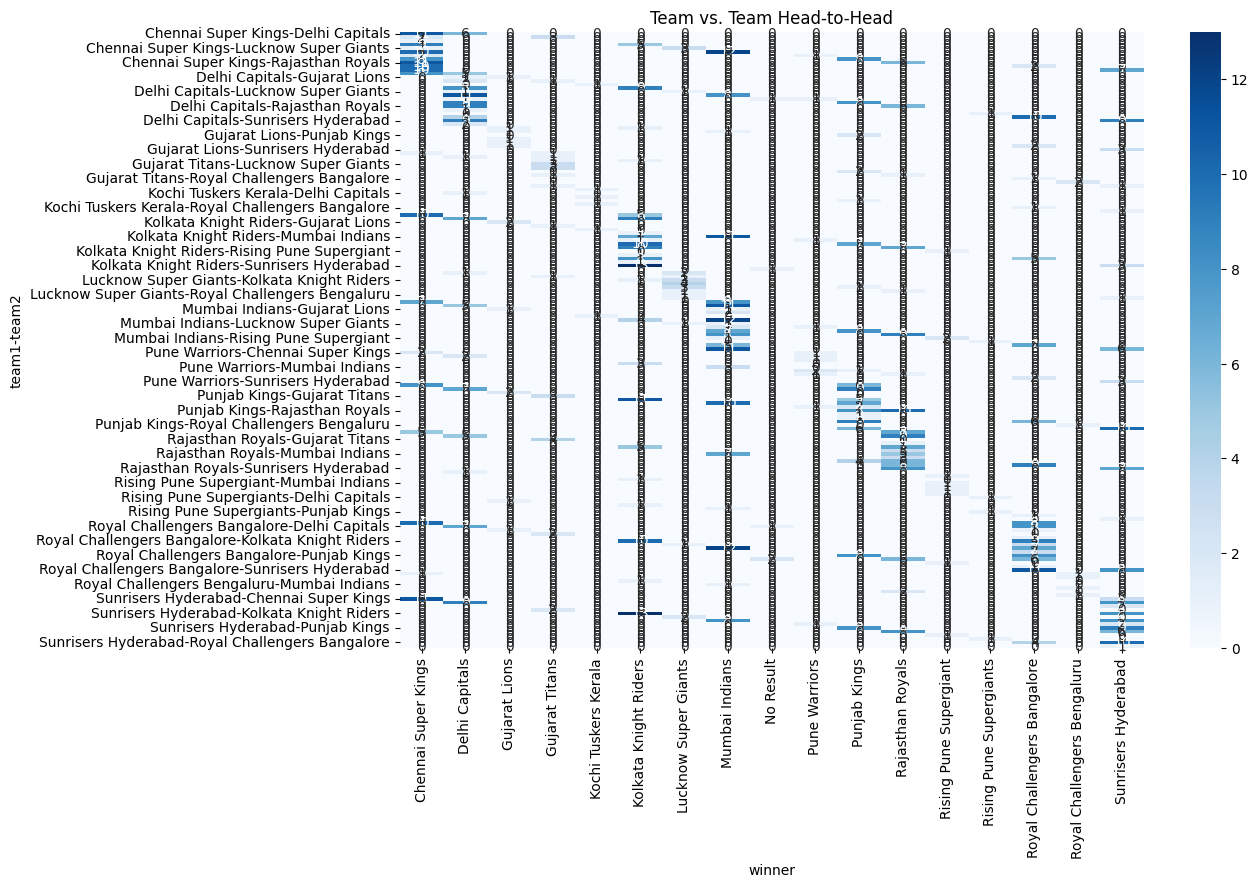

In [99]:
# Heatmap: Team vs. Team
plt.figure(figsize=(12, 8))
sns.heatmap(head_to_head, annot=True, cmap='Blues')
plt.title('Team vs. Team Head-to-Head')
plt.show()

<Figure size 1000x600 with 0 Axes>

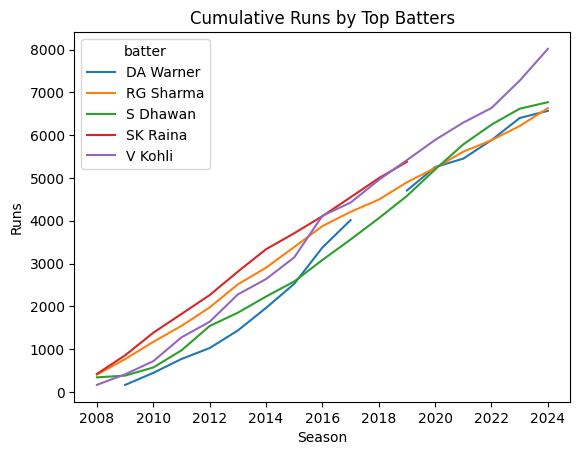

In [102]:
# Cumulative runs
top_batters = runs_per_season.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5).index
cumulative_runs = runs_per_season[runs_per_season['batter'].isin(top_batters)].pivot(index='season', columns='batter', values='batsman_runs').cumsum()
plt.figure(figsize=(10, 6))
cumulative_runs.plot()
plt.title('Cumulative Runs by Top Batters')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()


In [103]:
# Save precomputed stats
orange_cap.to_json('../data/precomputed_stats/orange_cap.json')
purple_cap.to_json('../data/precomputed_stats/purple_cap.json')
team_matches.to_json('../data/precomputed_stats/team_stats.json')

# Save processed data
matches.to_csv('../data/matches_processed.csv', index=False)
deliveries.to_csv('../data/deliveries_processed.csv', index=False)